Question 1:

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

Part A:

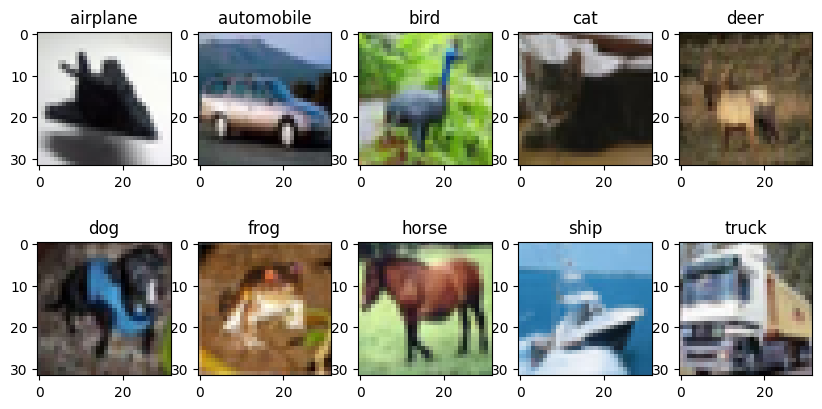

In [47]:
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = (y_train == i).flatten().nonzero()[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])

Part B:

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split, ParameterGrid
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

x_train= x_train.reshape((x_train.shape[0], -1))
x_val = x_val.reshape((x_val.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


def build_model(hidden_units=5, hidden_layers=2, learning_rate=0.001, dropout_rate=0.3):
    model = Sequential()
    model.add(Dense(hidden_units, activation='relu', input_shape=(x_train.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(hidden_units, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model

param_grid = {
    'hidden_units': [5],
    'hidden_layers': [1, 2],
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.8, 0.5]
}

grid = ParameterGrid(param_grid)
histories = {}

for i, params in enumerate(grid):
    print(f"Training with parameters: {params}")
    model = build_model(**params)
    history = model.fit(x_train, y_train, epochs=10, batch_size=128,validation_data=(x_val, y_val), verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    print(f"Validation accuracy: {val_acc:.4f}")
    histories[f'model_{i}_params_{i}'] = history


Training with parameters: {'dropout_rate': 0.8, 'hidden_layers': 1, 'hidden_units': 5, 'learning_rate': 0.001}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation accuracy: 0.0958
Training with parameters: {'dropout_rate': 0.8, 'hidden_layers': 1, 'hidden_units': 5, 'learning_rate': 0.01}
Validation accuracy: 0.1031
Training with parameters: {'dropout_rate': 0.8, 'hidden_layers': 2, 'hidden_units': 5, 'learning_rate': 0.001}
Validation accuracy: 0.1816
Training with parameters: {'dropout_rate': 0.8, 'hidden_layers': 2, 'hidden_units': 5, 'learning_rate': 0.01}
Validation accuracy: 0.0985
Training with parameters: {'dropout_rate': 0.5, 'hidden_layers': 1, 'hidden_units': 5, 'learning_rate': 0.001}
Validation accuracy: 0.0958
Training with parameters: {'dropout_rate': 0.5, 'hidden_layers': 1, 'hidden_units': 5, 'learning_rate': 0.01}
Validation accuracy: 0.1028
Training with parameters: {'dropout_rate': 0.5, 'hidden_layers': 2, 'hidden_units': 5, 'learning_rate': 0.001}
Validation accuracy: 0.0958
Training with parameters: {'dropout_rate': 0.5, 'hidden_layers': 2, 'hidden_units': 5, 'learning_rate': 0.01}
Validation accuracy: 0.1031


Part C:

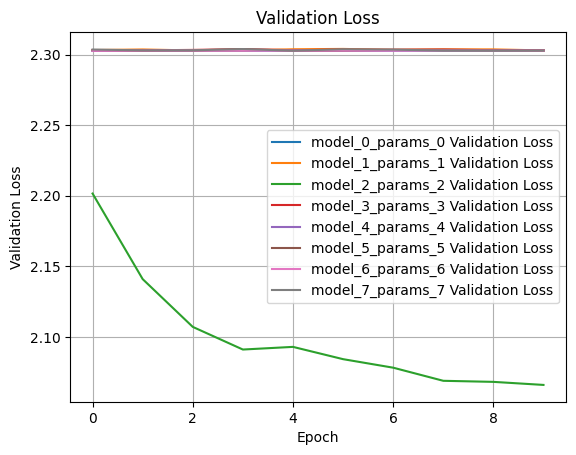

In [49]:
plt.figure()

for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')

plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)

Part D:

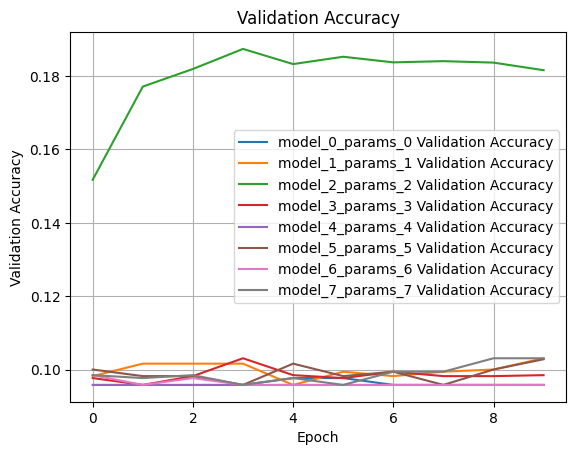

In [50]:
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')

plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)

Question 2:


Part A:

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd

file_path = '/content/drive/My Drive/airfoil_self_noise.dat'

df = pd.read_csv(file_path, delimiter='\t')
df.columns = ['frequency', 'aoa', 'chord length', 'free stream velocity', 'suction side displacement', 'scaled sound pressure']

display(df.head())

,frequency,aoa,chord length,free stream velocity,suction side displacement,scaled sound pressure
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


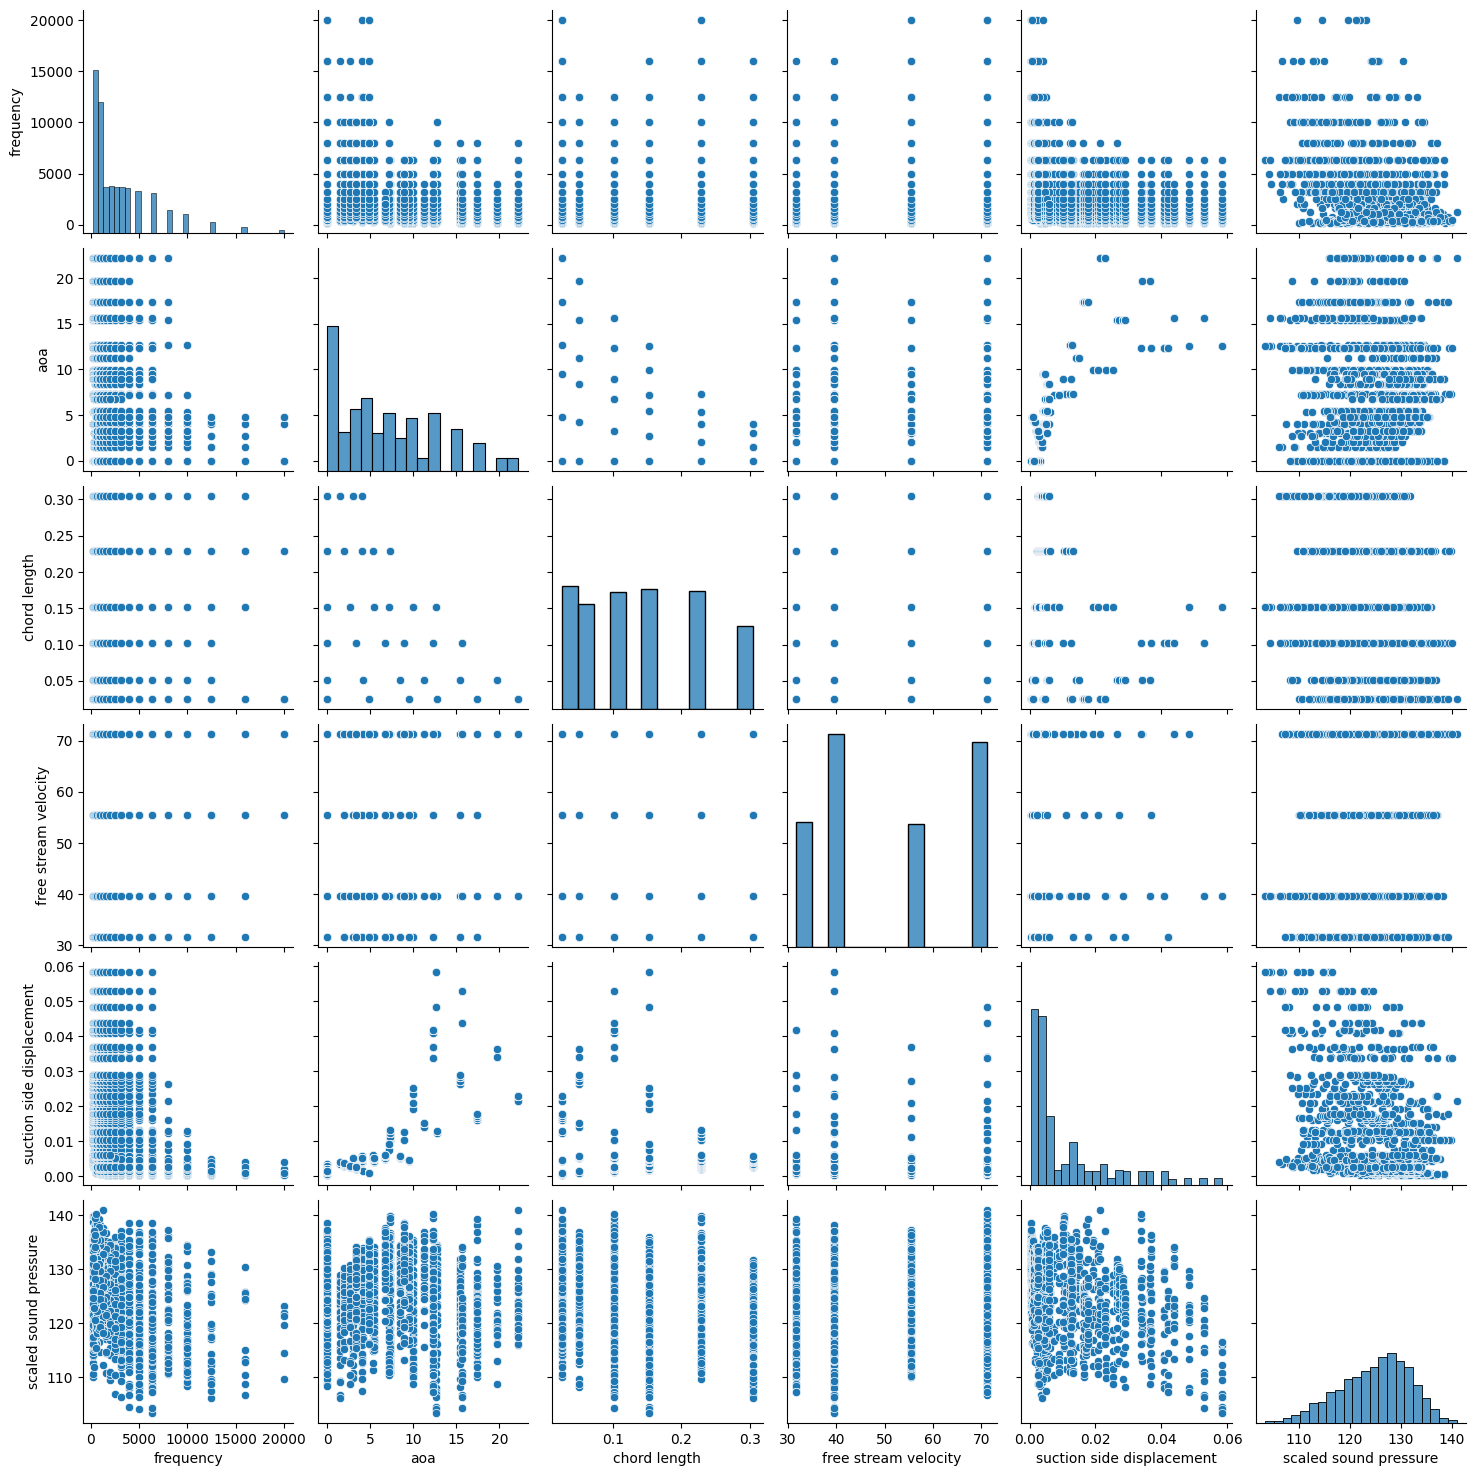

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

Part B:

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop('scaled sound pressure', axis=1)
y = df['scaled sound pressure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(3, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(3, activation='relu'),
    Dense(1)
])
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.3, verbose=1)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8103493.5000 - mae: 2038.1755 - val_loss: 6686230.0000 - val_mae: 1774.1646
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5558242.0000 - mae: 1699.6404 - val_loss: 5048445.5000 - val_mae: 1550.1212
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4369170.5000 - mae: 1533.9094 - val_loss: 3803060.7500 - val_mae: 1353.9393
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3196447.0000 - mae: 1308.2346 - val_loss: 2913075.2500 - val_mae: 1192.9940
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2605969.5000 - mae: 1168.9794 - val_loss: 2235064.5000 - val_mae: 1052.9038
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2370291.5000 - mae: 1085.4469 - val_loss: 1705437.7500 - val_mae: 927.7585
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1460742.2500 - mae: 900.4458 - val_loss: 1322812.2500 - val_mae: 824.5626
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 132313

In [57]:
evaluation_results = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {evaluation_results[0]:.4f}")
print(f"Test Mean Absolute Error: {evaluation_results[1]:.4f}")

Test Loss: 21106.1094
Test Mean Absolute Error: 143.8683


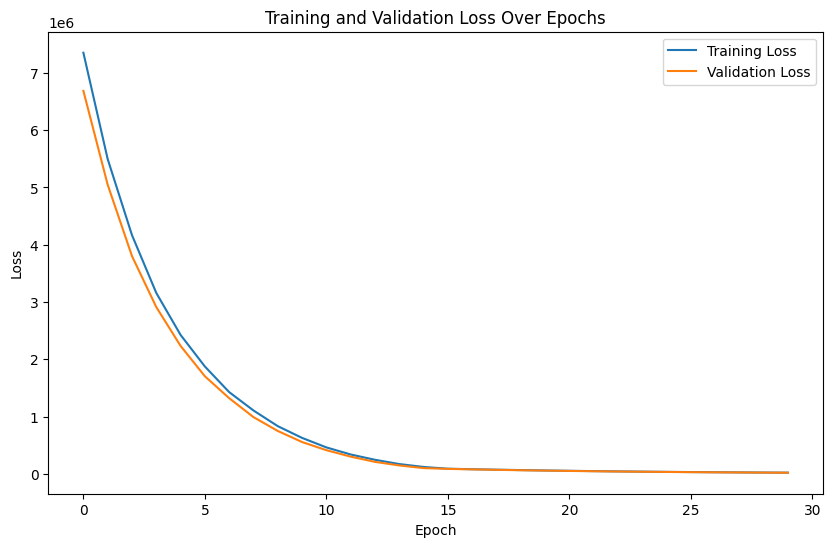

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

Part C:

In [60]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
-474.0921207549683
